In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv(r"C:\Users\Welcome\Downloads\archive (1)\auto-mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


In [5]:
X = df[['horsepower']]
y = df['mpg']


In [6]:
X.fillna(X.mean(), inplace=True)


C:\Users\Welcome\AppData\Local\Temp\ipykernel_29384\1183906534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [9]:
def polynomial_model(degree):
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    return y_train_pred, y_test_pred


In [10]:
results = {}

for d in [2, 3, 4]:
    y_train_pred, y_test_pred = polynomial_model(d)
    results[d] = (y_train_pred, y_test_pred)


In [11]:
performance = []

for degree, (y_train_pred, y_test_pred) in results.items():
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    
    performance.append([degree, mse, rmse, r2])

perf_df = pd.DataFrame(
    performance,
    columns=['Degree', 'MSE', 'RMSE', 'R2 Score']
)

perf_df


,Degree,MSE,RMSE,R2 Score
0,2,13.760855,3.709563,0.744062
1,3,13.813374,3.716635,0.743086
2,4,14.118024,3.757396,0.737419


In [12]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("Ridge R²:", r2_score(y_test, ridge_pred))


Ridge R²: 0.7393719439438622


c:\Users\Welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


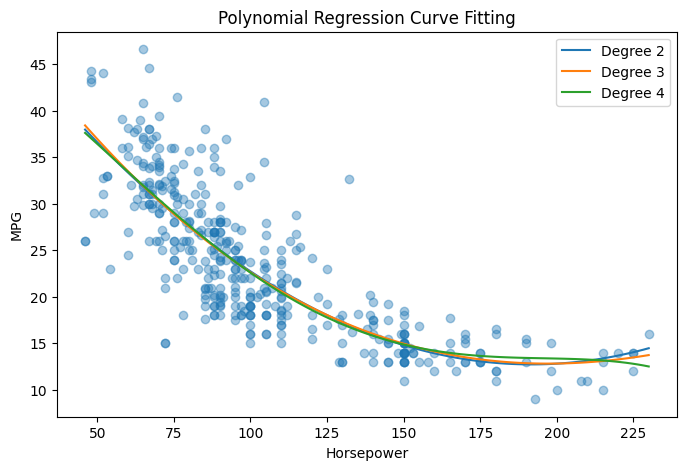

In [13]:
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.4)

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_plot = poly.fit_transform(X_plot_scaled)
    
    model = LinearRegression()
    model.fit(poly.fit_transform(X_scaled), y)
    
    y_plot = model.predict(X_poly_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()


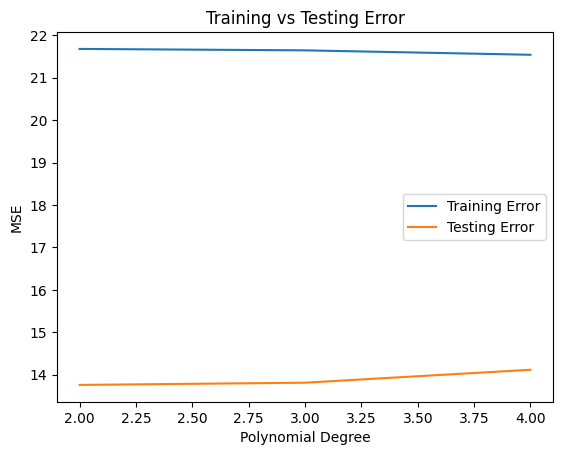

In [14]:
train_errors = []
test_errors = []

for degree in [2, 3, 4]:
    y_train_pred, y_test_pred = results[degree]
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot([2,3,4], train_errors, label="Training Error")
plt.plot([2,3,4], test_errors, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()


c:\Users\Welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


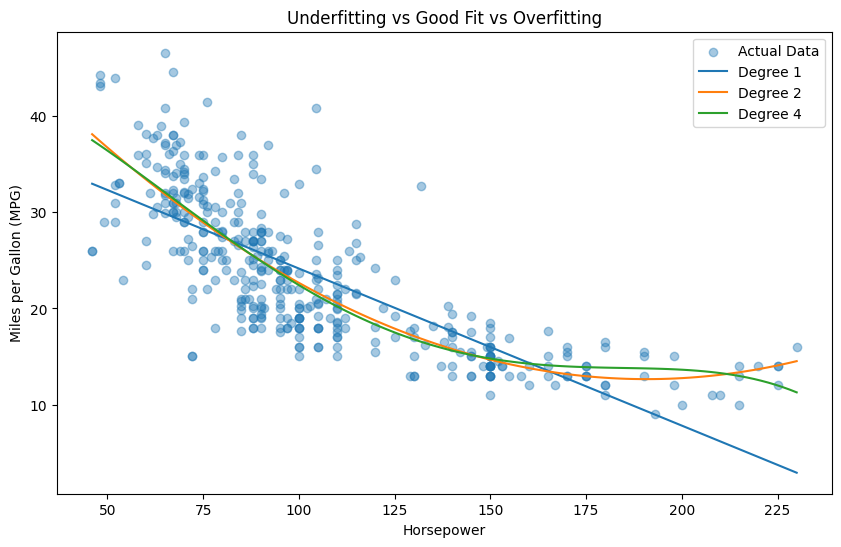

In [15]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, label="Actual Data")

for degree in [1, 2, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_plot_scaled)

    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)

    y_plot_pred = model.predict(X_poly)
    plt.plot(X_plot, y_plot_pred, label=f"Degree {degree}")

plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Underfitting vs Good Fit vs Overfitting")
plt.legend()
plt.show()
